In [1]:
from micrograd.nn import Neuron, Value, Layer
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ data %.4f | grad %.4f }" % (n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

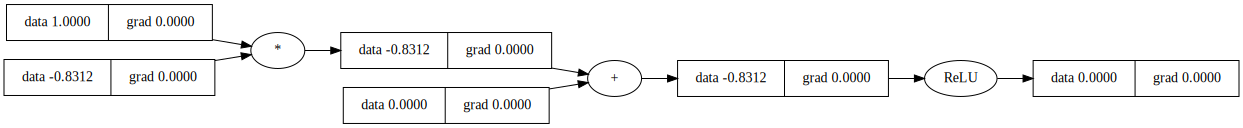

In [2]:
i = Value(1)
l = Layer(1,1)
x = l([i])

draw_dot(x)

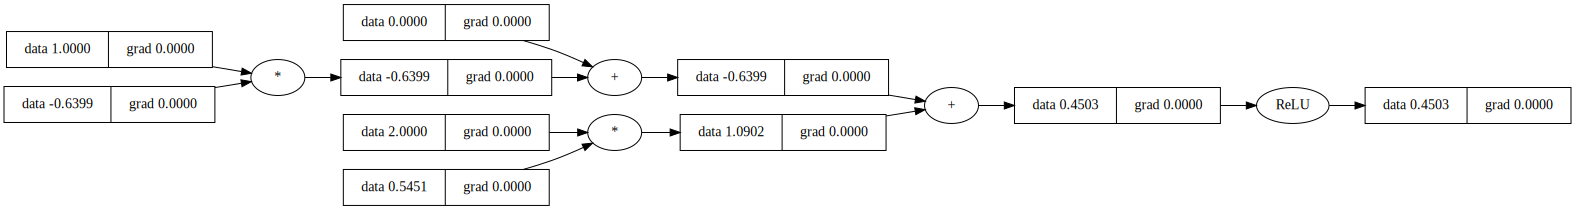

In [3]:
i = [Value(1), Value(2)]
l = Layer(2,1)
x = l(i)

draw_dot(x)

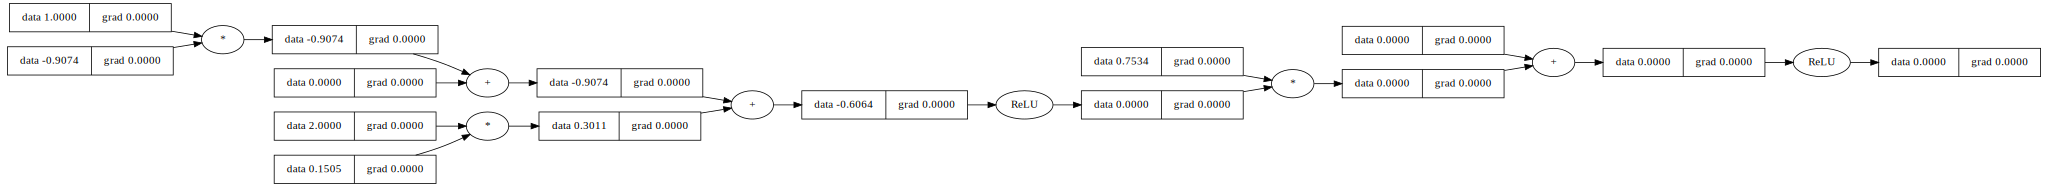

In [5]:
i = [Value(1), Value(2)]
l1 = Layer(2,1)
l2 = Layer(1,1)
x = l2([l1(i)])

draw_dot(x)

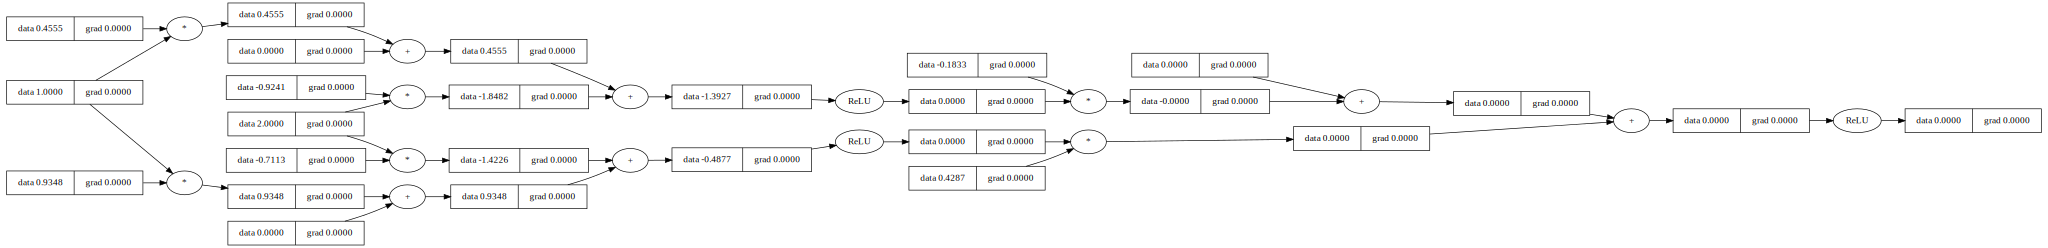

In [6]:
i = [Value(1), Value(2)]
l1 = Layer(2,2)
l2 = Layer(2,1)
x = l2(l1(i))

draw_dot(x)